In [1]:
from google.colab import drive
drive.mount('/drive')

# !pip install autocorrect

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import csv

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# NLP/Spellcheck 
import spacy
# import autocorrect

In [3]:
# Loading Advertisement Data
df = pd.read_csv('/drive/MyDrive/LDW 2021/Output/AdData.csv', nrows=5000)

# Loading Training Data (Skipped 500,000 & 600,000 rows and selected 1,100 observations)
train_df1 = pd.read_csv('/drive/MyDrive/LDW 2021/Output/AdData.csv', skiprows=[i for i in range(1, 500000)], nrows=1000)
train_df2 = pd.read_csv('/drive/MyDrive/LDW 2021/Output/AdData.csv', skiprows=[i for i in range(1, 600000)], nrows=100)

train_df = pd.concat([train_df1, train_df2])
del train_df1, train_df2

df.head(10)

,RecordID,text,pubDate,publisher,type
0,93258144,...,18730219,New York Times Company,Classified Advertisement
1,95235433,...,18950303,New York Times Company,Advertisement
2,95157230,...,18930903,New York Times Company,Advertisement
3,95437997,...,18961213,New York Times Company,Advertisement
4,91760250,...,18631105,New York Times Company,Classified Advertisement
5,91746370,...,18630210,New York Times Company,Advertisement
6,93393144,...,18740723,New York Times Company,Classified Advertisement
7,94331220,...,18850921,New York Times Company,Advertisement
8,93429664,...,18740716,New York Times Company,Classified Advertisement
9,91818777,...,18640728,New York Times Company,Classified Advertisement


In [4]:
# Checking Data Frame Shape
print(np.shape(df))

(5000, 5)


In [5]:
# Checking for duplicated advertisements
df['RecordID'].duplicated().any()

False

In [6]:
# Cleaning up OCR Errors using Regular Expressions
def regex(df):
  df['text'] = df['text'].str.replace('(\s\s+)', '', regex=True)

  expressions = ["(?<![a-z])-|-(?![a-z])", "(?<![a-z])'|'(?!s)", "(?<![a-z\s])&(?![\sa-z])", "([^A-Za-z \t & '])"]
  for regularExp in expressions:
    replacement = ''
    if regularExp == "(?<![a-z])-|-(?![a-z])":
      replacement = ' '
      df['text'] = df['text'].str.replace(regularExp, replacement, regex=True)

    else:
      df['text'] = df['text'].str.replace(regularExp, replacement, regex=True)
  
  df['text'] = df['text'].replace('',np.NaN)
  df['text'] = df['text'].str.lower().replace('\s\s+', ' ', regex=True)
  
  # Printing Test Example
  print(df['text'][0])

regex(df)
regex(train_df)

lair atlnu no wesl ststst betweenand sthav marble and marbleized head of at very low pricessteslate alatb lls rich anddesigns elate work of ovary marble and wood mantels t b ste w altfc co ru go apdvile&tadaiib bq
0    m uj j i rai i george m ikm i uo bren btll geo...
0                                                  NaN
Name: text, dtype: object


In [7]:
# Checking for Missing Values
print(df[df.isnull().any(axis=1)])

       RecordID text   pubDate            publisher           type
119   491674048  NaN  19880526  Atlanta Daily World  Advertisement
162   491397388  NaN  19730722  Atlanta Daily World  Advertisement
186   491697758  NaN  19891012  Atlanta Daily World  Advertisement
190   491760478  NaN  19940524  Atlanta Daily World  Advertisement
307   490955951  NaN  19511218  Atlanta Daily World  Advertisement
...         ...  ...       ...                  ...            ...
4895  491061180  NaN  19550601  Atlanta Daily World  Advertisement
4896  491305015  NaN  19631001  Atlanta Daily World  Advertisement
4909  491377924  NaN  19720608  Atlanta Daily World  Advertisement
4913  491126827  NaN  19571130  Atlanta Daily World  Advertisement
4975  491184068  NaN  19591009  Atlanta Daily World  Advertisement

[126 rows x 5 columns]


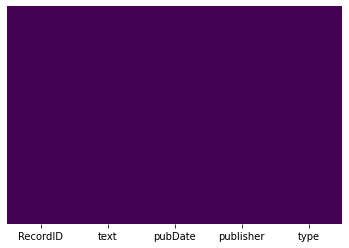

In [8]:
# Dropping Missing Values
df = df.dropna(subset=['text']).reset_index(drop=True)
train_df = train_df.dropna(subset=['text']).reset_index(drop=True)

# Rechecking for Missing Values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

In [9]:
# Checking data types -> 'pubDate' is an int; not datetime
df.info()
df['pubDate'] = pd.to_datetime(df['pubDate'], format='%Y%m%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   RecordID   4874 non-null   int64 
 1   text       4874 non-null   object
 2   pubDate    4874 non-null   int64 
 3   publisher  4874 non-null   object
 4   type       4874 non-null   object
dtypes: int64(2), object(3)
memory usage: 190.5+ KB


In [10]:
# Checking For Both Publishers
df.sort_values(by='publisher', ascending=False)

,RecordID,text,pubDate,publisher,type
0,93258144,lair atlnu no wesl ststst betweenand sthav mar...,1873-02-19,New York Times Company,Classified Advertisement
49,91624799,drs rn yorkstore h o tt id fit afit ca have re...,1861-08-26,New York Times Company,Classified Advertisement
35,95356087,itur dyepepelntnlcoachl dr t ii androws late o...,1896-06-12,New York Times Company,Advertisement
36,95330953,real estate adv irwrru lai ltate i rwerrtatt c...,1895-04-24,New York Times Company,Advertisement
37,91924303,instrnn liiyitlrw jwrvflfijrnygrand th av reo...,1865-09-17,New York Times Company,Classified Advertisement
...,...,...,...,...,...
1666,491331142,could iiu medical bill yes with u trawlers ma...,1969-01-04,Atlanta Daily World,Advertisement
1665,491751218,local brefsnpu inpu i will meet wednesday aug ...,1993-08-12,Atlanta Daily World,Advertisement
1664,491731990,public notice from mayor s office atlanta comm...,1992-03-05,Atlanta Daily World,Advertisement
1663,491730337,in memory of a great man dr ml king jr on his ...,1992-01-19,Atlanta Daily World,Advertisement


Searching For:
* Address/Location
* Product
* Company Name

In [11]:
# Printing Example Texts
for i in range(10, 15):
  print('https://search-proquest-com.proxy.library.nyu.edu/docview/' + str(df['RecordID'][i]))
  print('Text:', df['text'][i], '\n')

https://search-proquest-com.proxy.library.nyu.edu/docview/95244447
Text: louis auctioneer regular auction sale op stocks andby adrian h muller & son wednesday april s at at the new york real estate salesroom no broadway by order of brooklyn trust co executor of estate of mary e y howe chicago rock island & pacific r r st mtge extension and coil s p c eds ae chicago burlington & quincy r r nebraska extension skg fund p c eds wabash b it co let mtge p c ed western union telegraph co p c coil trust eds chicago & eastern illinois r b p c gen cease eds american cotton oil co s p c deb bds long island r b genael mtge p a eds she the trinidad asphalt co by order of brooklyn trust co executor of estate of darius allen deceased shs standard oil trust co shs citizensae electric illuminating co bae klyn shs municipal electric light co baeklyn cbs williamsburgh city fire ins co shs american type founders prevd shs american type founders common sha consolidated fire works co america cons shs mechan

In [12]:
df.head(10)

,RecordID,text,pubDate,publisher,type
0,93258144,lair atlnu no wesl ststst betweenand sthav mar...,1873-02-19,New York Times Company,Classified Advertisement
1,95235433,beecham's pills for constipation ioo and get t...,1895-03-03,New York Times Company,Advertisement
2,95157230,phe peruan hub line i out all staring signs hi...,1893-09-03,New York Times Company,Advertisement
3,95437997,why not a music box for your holiday present a...,1896-12-13,New York Times Company,Advertisement
4,91760250,g new wo rh by sorace greely the attieitican c...,1863-11-05,New York Times Company,Classified Advertisement
5,91746370,official drawings of eddy i cos ix iand iiiuri...,1863-02-10,New York Times Company,Advertisement
6,93393144,situations cantedfeeamstites by a foman ascnn ...,1874-07-23,New York Times Company,Classified Advertisement
7,94331220,special noticeshenry a b di d no lexington av ...,1885-09-21,New York Times Company,Advertisement
8,93429664,phelps bodge & coihipurter of iiieteilbtin pl...,1874-07-16,New York Times Company,Classified Advertisement
9,91818777,r gomnxloadnanoe nar department july sealed p...,1864-07-28,New York Times Company,Classified Advertisement


In [13]:
# Autocorrecting Before NLP
# NOTE: 'only_replacements' supposedly works better for NLP
# spell = autocorrect.Speller(only_replacements=True)

In [14]:
# Applying autocorrect to train_df
# train_df['text'] = train_df['text'].apply(lambda x: spell(x))

# Cleaning Training Data
train_df.drop(columns=['pubDate', 
                 'type'], axis=0, inplace=True)

train_df.to_csv('/drive/MyDrive/LDW 2021/Output/TrainingData.csv', index=True, encoding='utf-8')

train_df.head()

,RecordID,text,publisher
0,490476122,m uj j i rai i george m ikm i uo bren btll geo...,Atlanta Daily World
1,490447738,hi ill b v sunshine best american tuna fish ch...,Atlanta Daily World
2,490482979,cleansing and soothing for personal hygiene cr...,Atlanta Daily World
3,490501599,theatre bob steele in kid ranger alto chap th...,Atlanta Daily World
4,490489523,right on duty no one would suspect she used to...,Atlanta Daily World


In [15]:
# Applying autocorrect to df
# df['text'] = df['text'].apply(lambda x: spell(x))

# Exporting Cleaned Version of Data
df.to_csv('/drive/MyDrive/LDW 2021/Output/CleanData.csv', index=False, encoding='utf-8')

df.head()

,RecordID,text,pubDate,publisher,type
0,93258144,lair atlnu no wesl ststst betweenand sthav mar...,1873-02-19,New York Times Company,Classified Advertisement
1,95235433,beecham's pills for constipation ioo and get t...,1895-03-03,New York Times Company,Advertisement
2,95157230,phe peruan hub line i out all staring signs hi...,1893-09-03,New York Times Company,Advertisement
3,95437997,why not a music box for your holiday present a...,1896-12-13,New York Times Company,Advertisement
4,91760250,g new wo rh by sorace greely the attieitican c...,1863-11-05,New York Times Company,Classified Advertisement
